In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

%run functions.ipynb

In [2]:
data = pd.read_csv('../Data/BankChurners.csv')
data.drop(columns=data.columns[-2:], inplace=True)
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [4]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [5]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [7]:
data.Attrition_Flag.value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [8]:
data['churn'] = np.where(data['Attrition_Flag'] == 'Existing Customer', 0, 1).astype(bool)
data.churn.value_counts()

churn
False    8500
True     1627
Name: count, dtype: int64

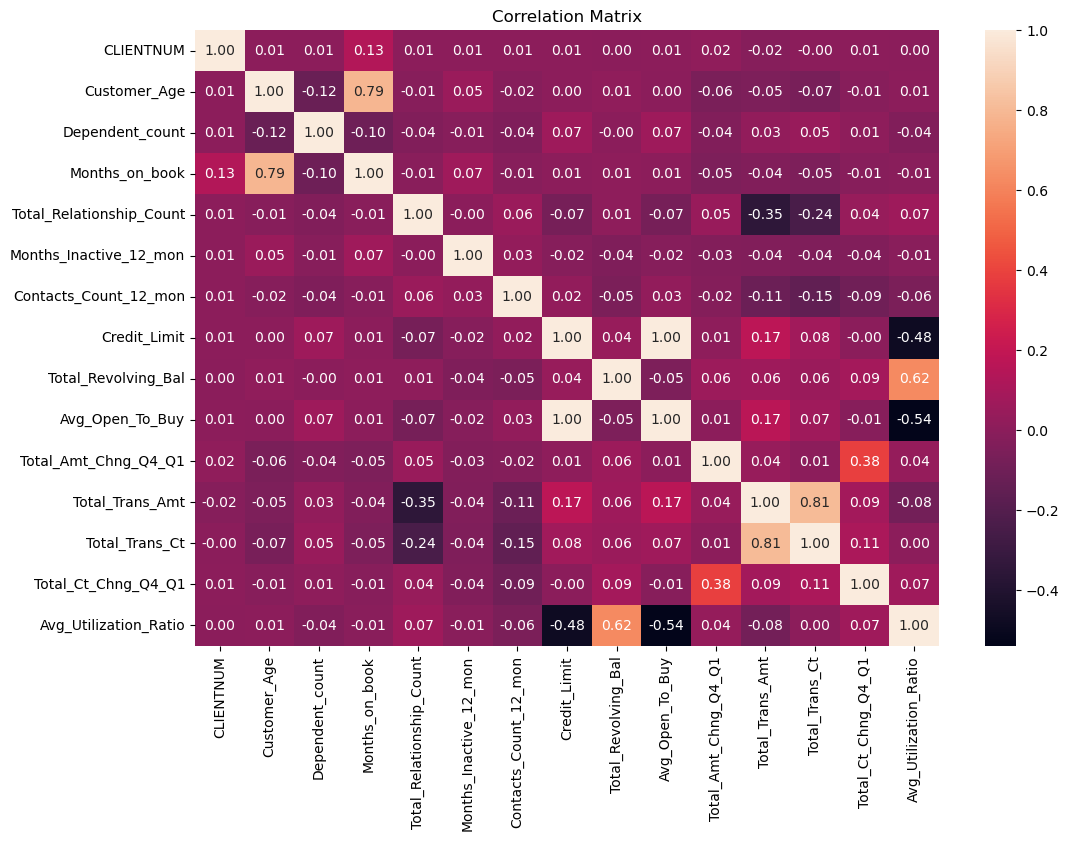

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, fmt='.2f', ax=ax).set_title('Correlation Matrix')
plt.show()

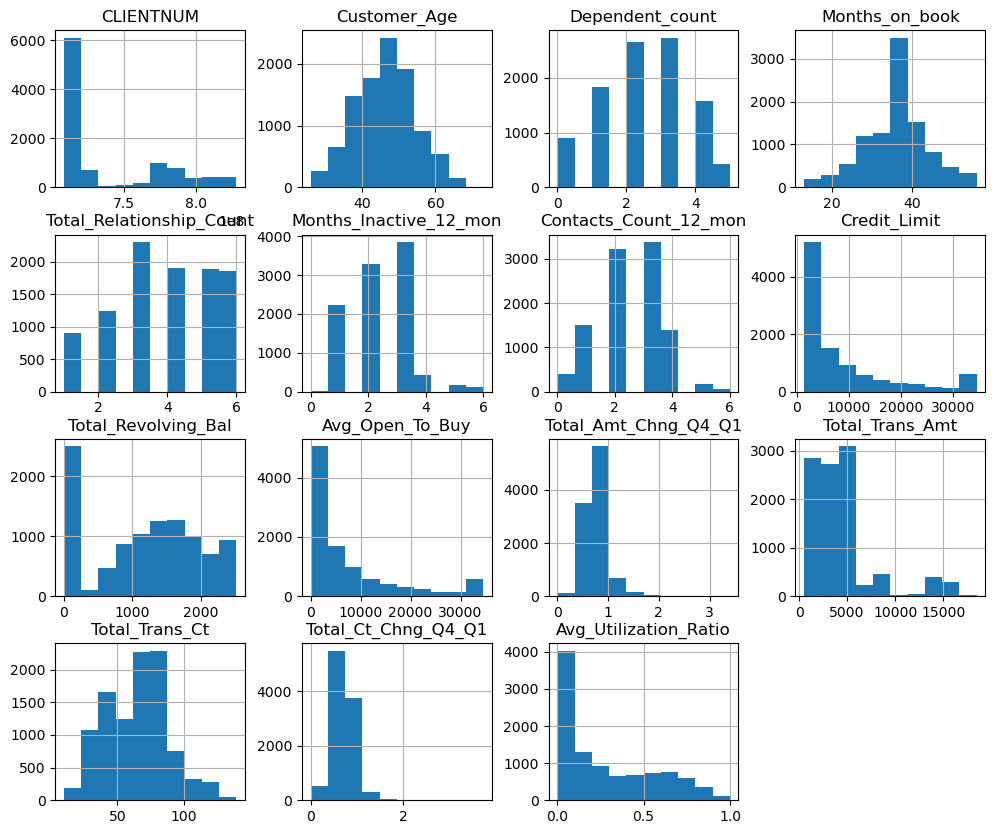

In [10]:
data.hist(figsize=(12,10))
plt.show()

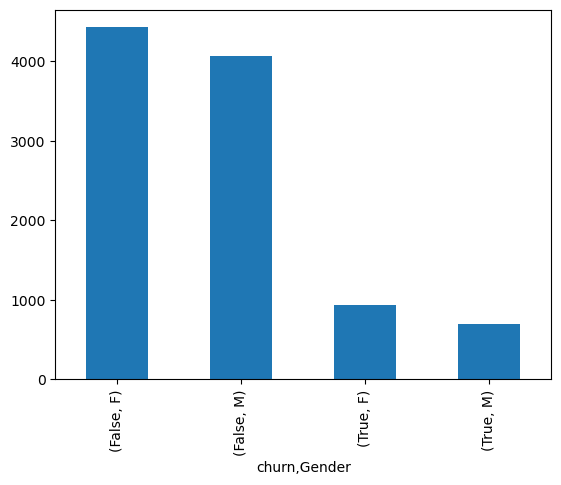

In [11]:
data.groupby('churn')['Gender'].value_counts().plot(kind='bar')
plt.show()

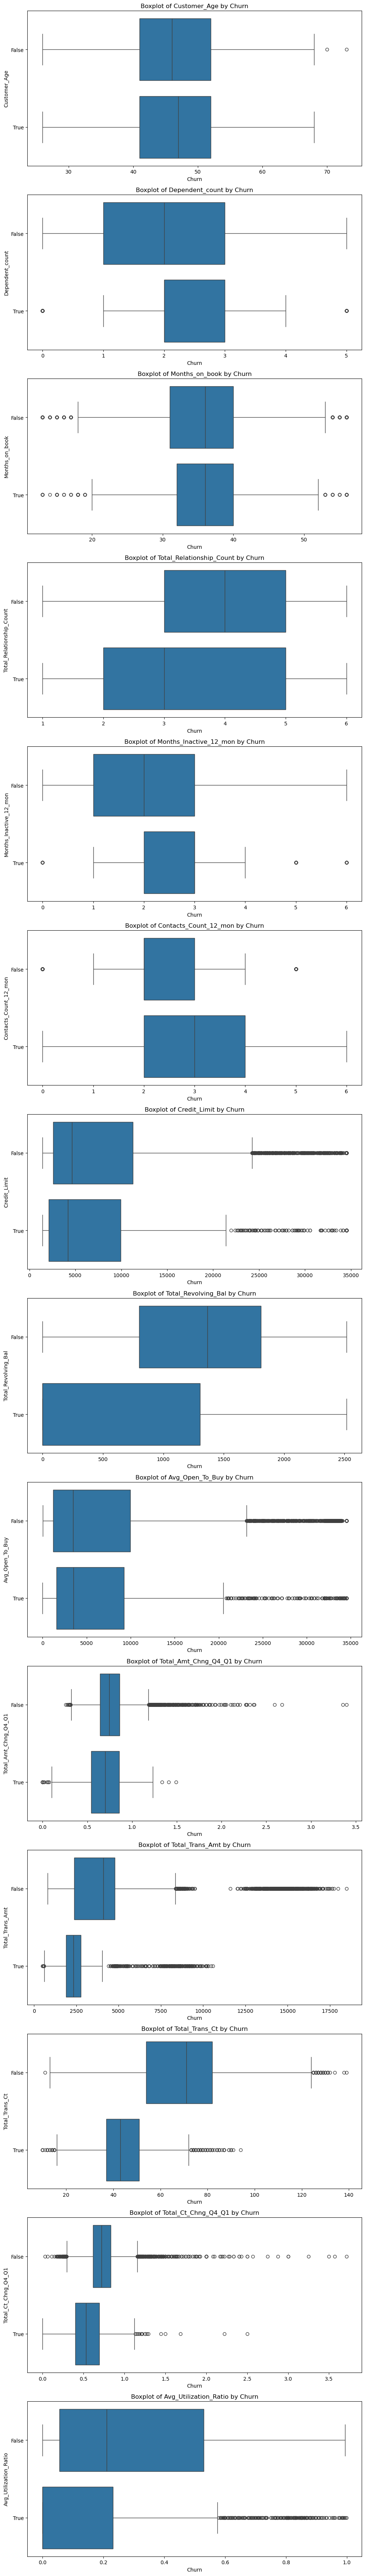

In [12]:
numeric_columns = data.select_dtypes(include='number').columns[1:]
num_features = len(numeric_columns)
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 5 * num_features))

# Create a boxplot for each feature
for i, feature in enumerate(numeric_columns):
    sns.boxplot(x=feature, y='churn', data=data, orient='h', ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} by Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(feature)

# Adjust layout
plt.tight_layout()
plt.show()

Total revolving amount, total transaction amount, total transaction count, total count change, and average utilization ratio seem to have most significant profile different between churn and non-churn customers.

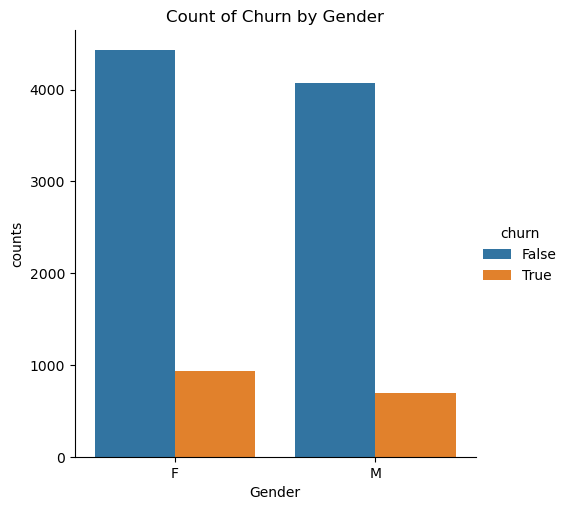

In [13]:
churn_counts = data.groupby(['Gender', 'churn']).size().reset_index(name='counts')
sns.catplot(data=churn_counts, kind='bar', x='Gender', y='counts', hue='churn')
plt.title("Count of Churn by Gender")
plt.show()

Gender doesnt appear to show a significant difference in churn

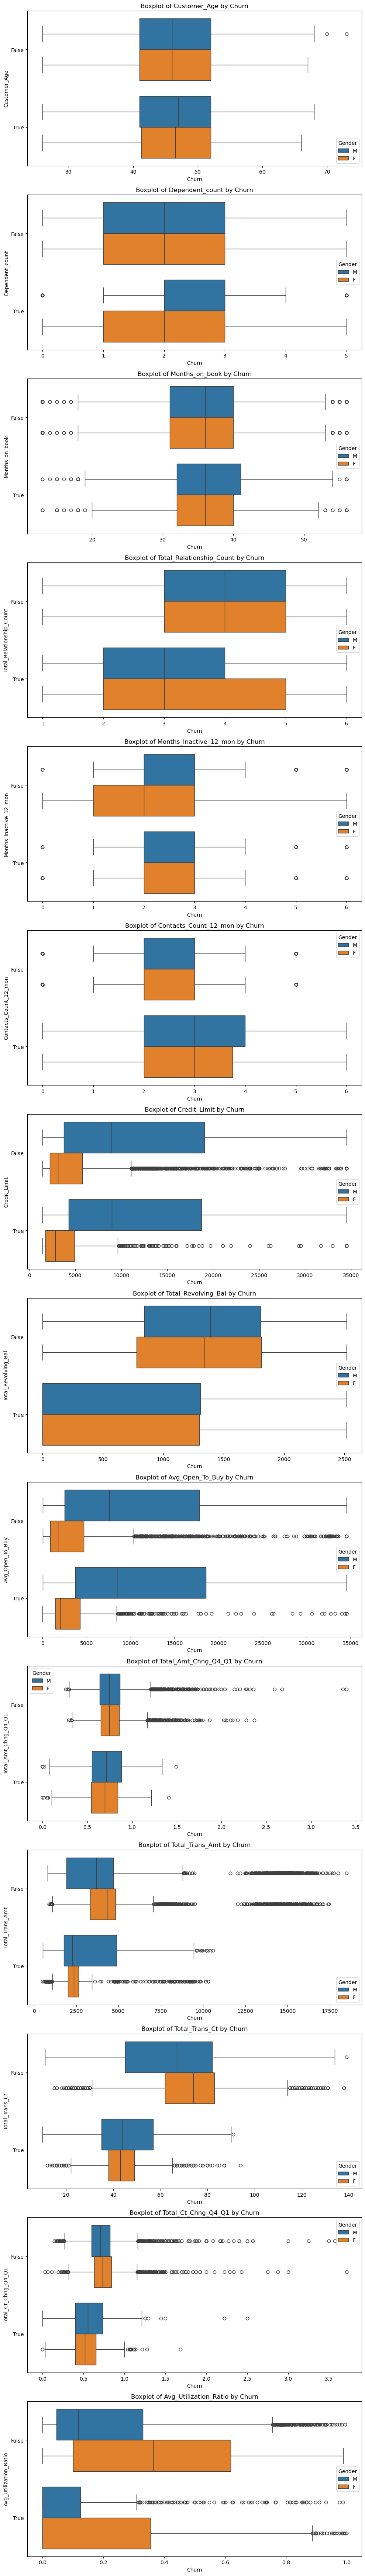

In [14]:
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 5 * num_features))

# Create a boxplot for each feature
for i, feature in enumerate(numeric_columns):
    sns.boxplot(x=feature, y='churn', hue='Gender', data=data, orient='h', ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} by Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(feature)

# Adjust layout
plt.tight_layout()
plt.show()

Profiles for dependent counts, total relationships, inactive months, credit limit, average open to buy, total transaction amounts, total transaction counts, and average utilization ratio all seem impacted by gender.

Gender should be considered as a key feature.

In [15]:
key_features = ['Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Gender']

**Feature engineering - create categories for numeric values**

Total_Revolving_Bal

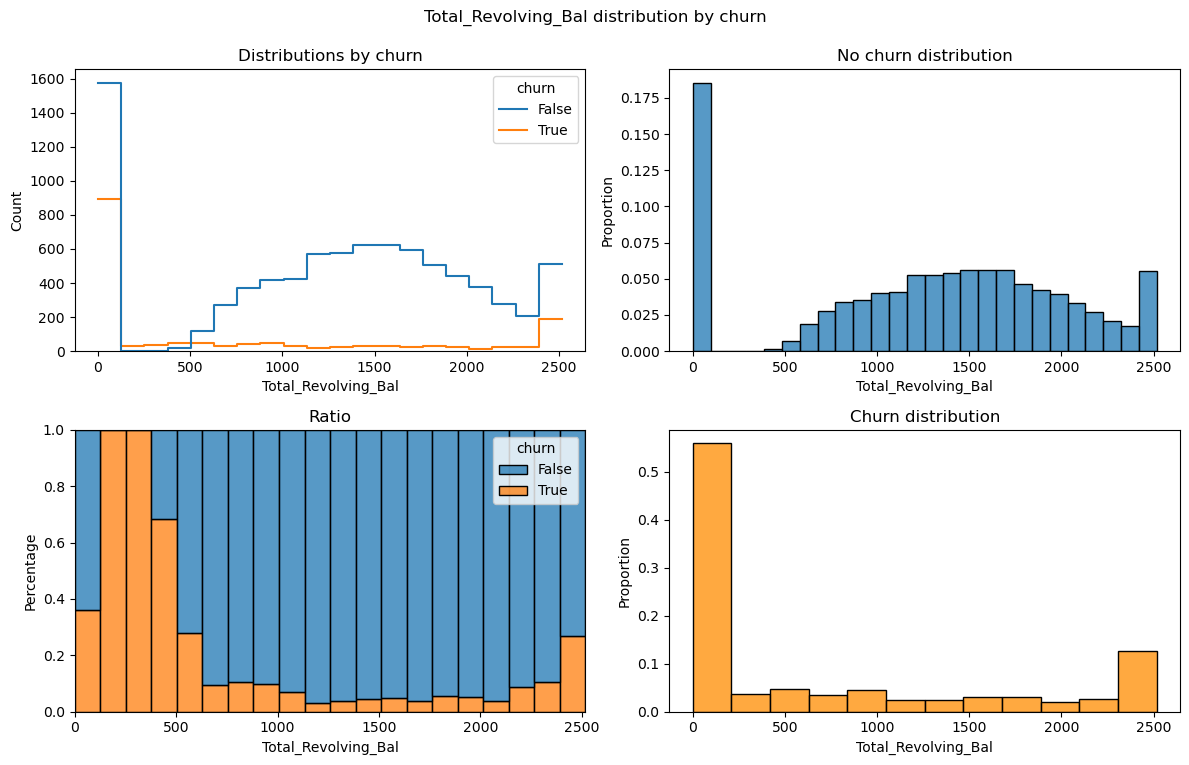

In [16]:
histplots_by(key_features[0], df=data)
plt.show()

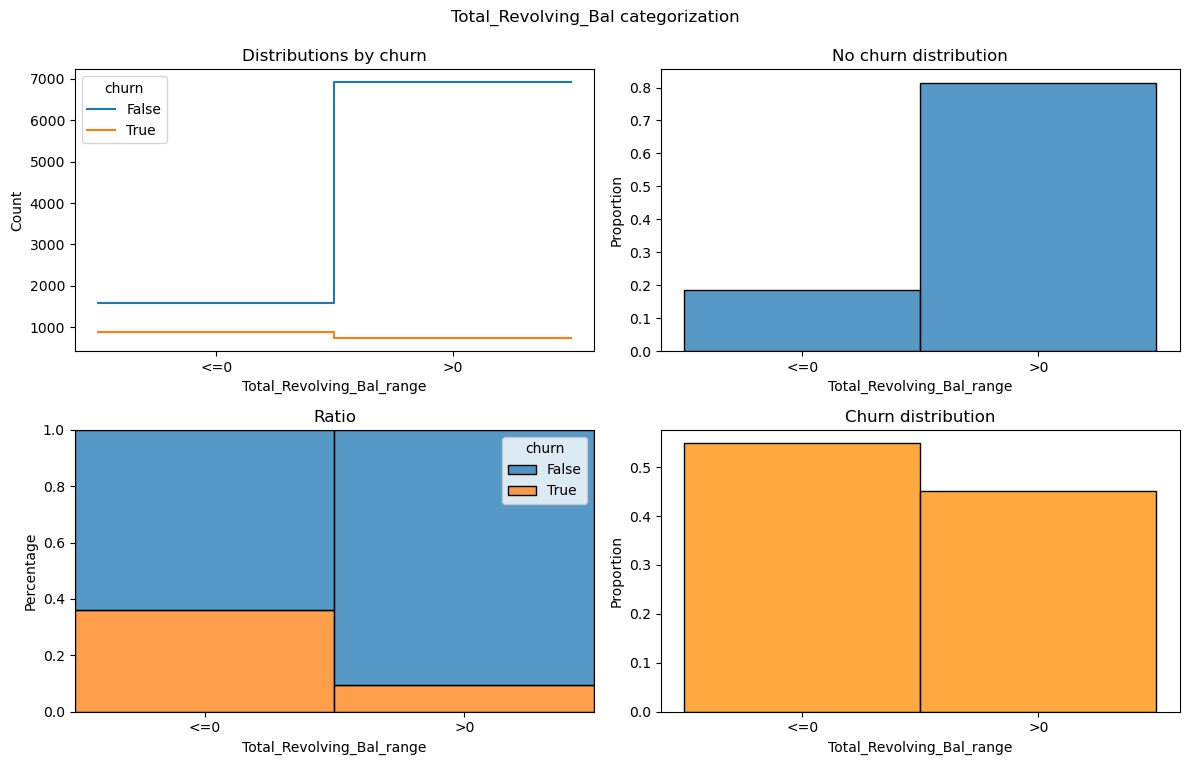

In [17]:
bins=[-np.inf,0,np.inf]

cut_data(key_features[0],bins,df=data)
plt.show()

Total_Trans_Amt

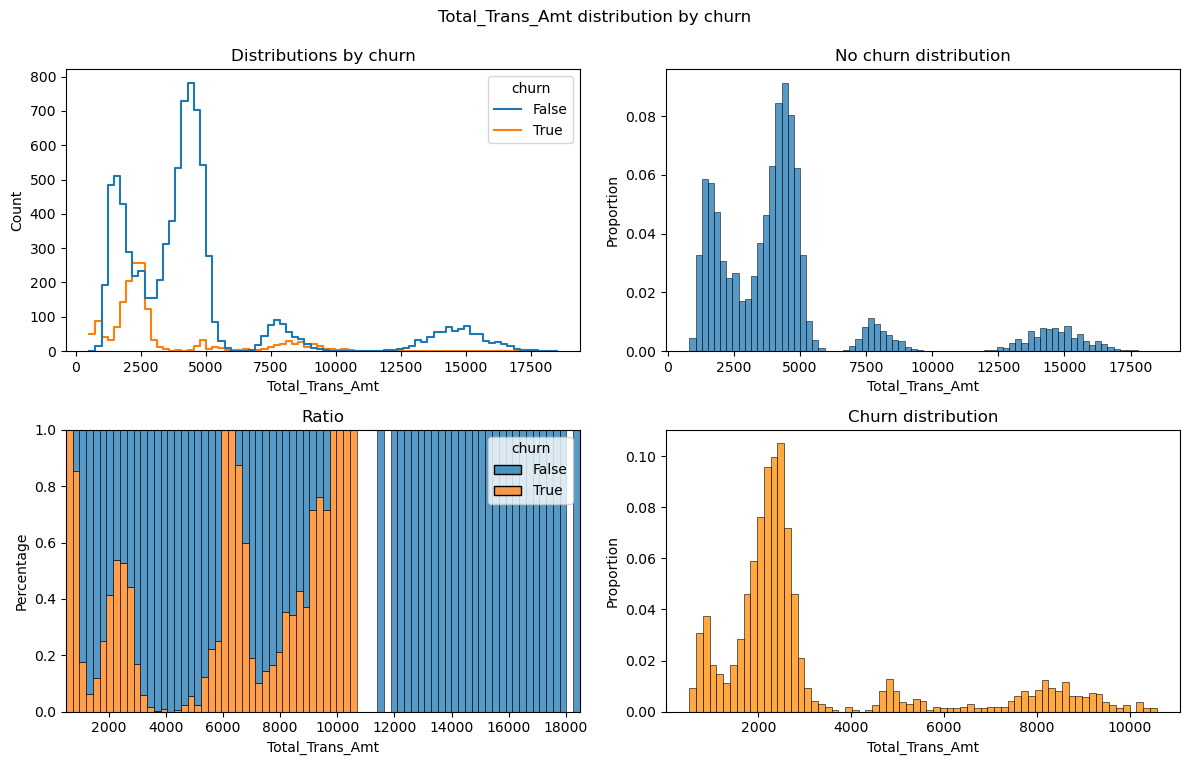

In [18]:
histplots_by(key_features[1], df=data)
plt.show()

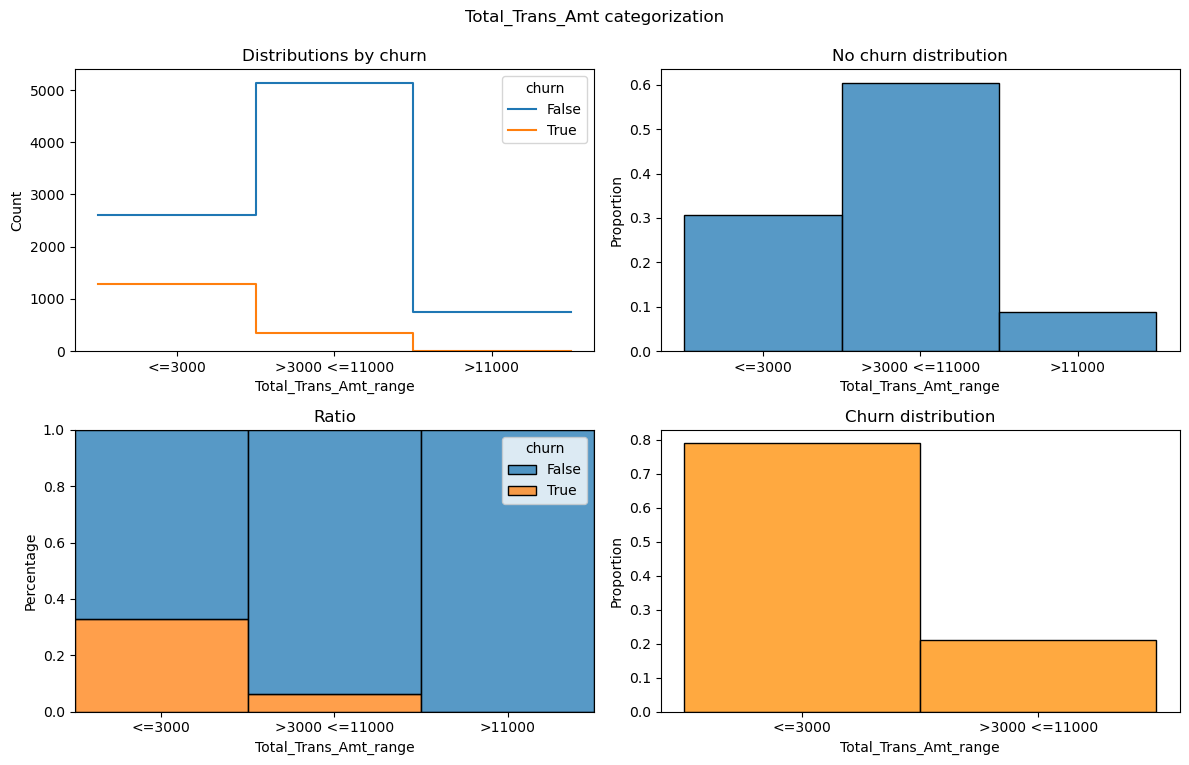

In [19]:
bins=[-np.inf,3000,11000,np.inf]

cut_data(key_features[1],bins,df=data)
plt.show()

Total_Trans_Ct

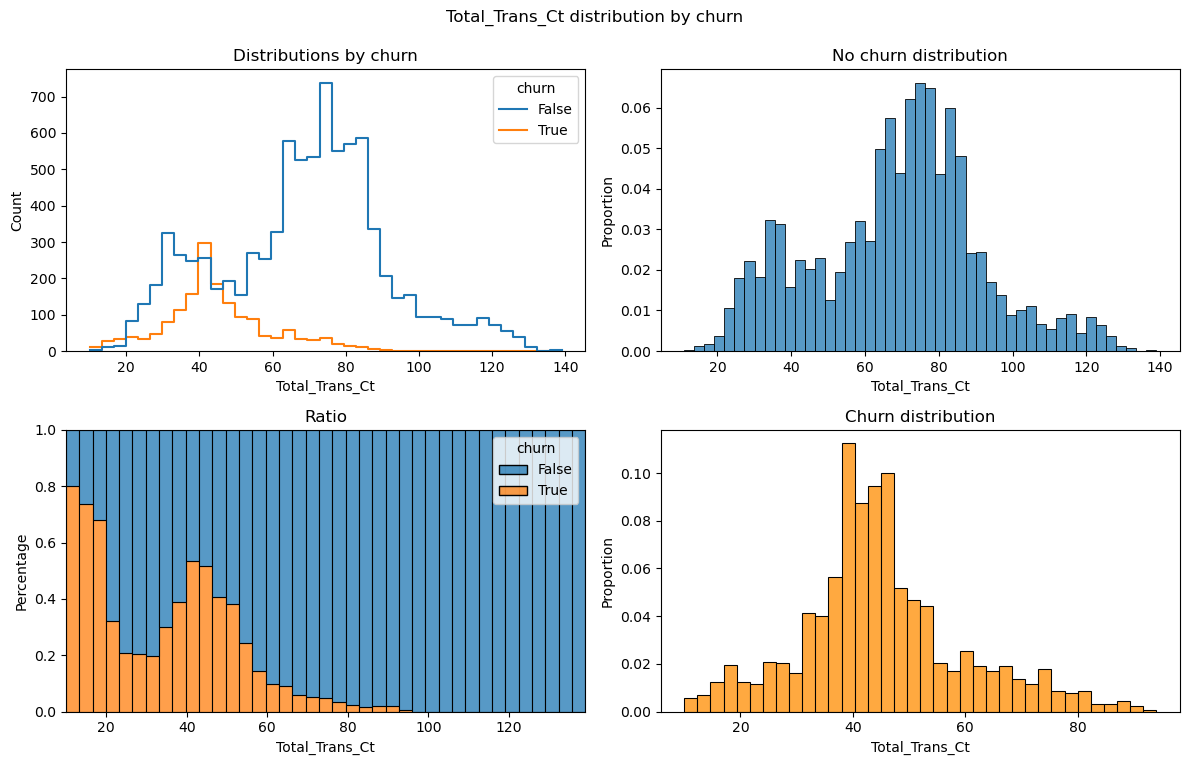

In [20]:
histplots_by(key_features[2], df=data)
plt.show()

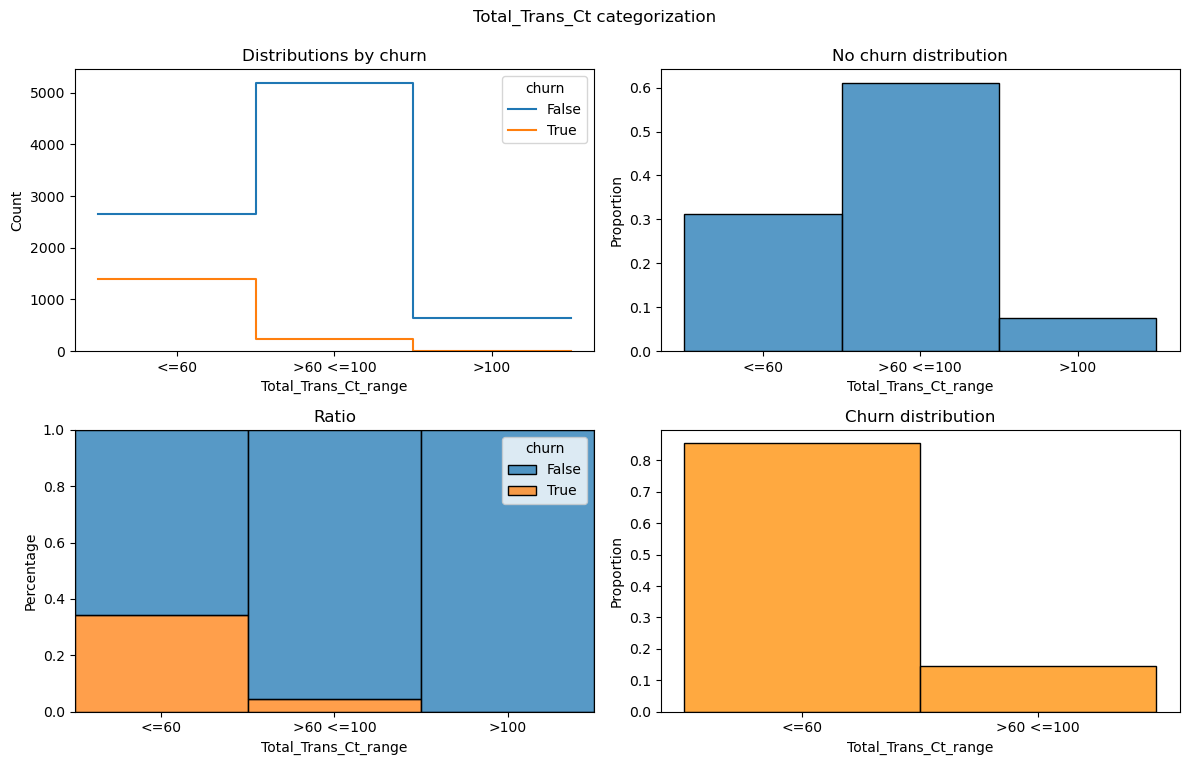

In [21]:
bins=[-np.inf,60,100,np.inf]

cut_data(key_features[2],bins,df=data)
plt.show()

Total_Ct_Chng_Q4_Q1

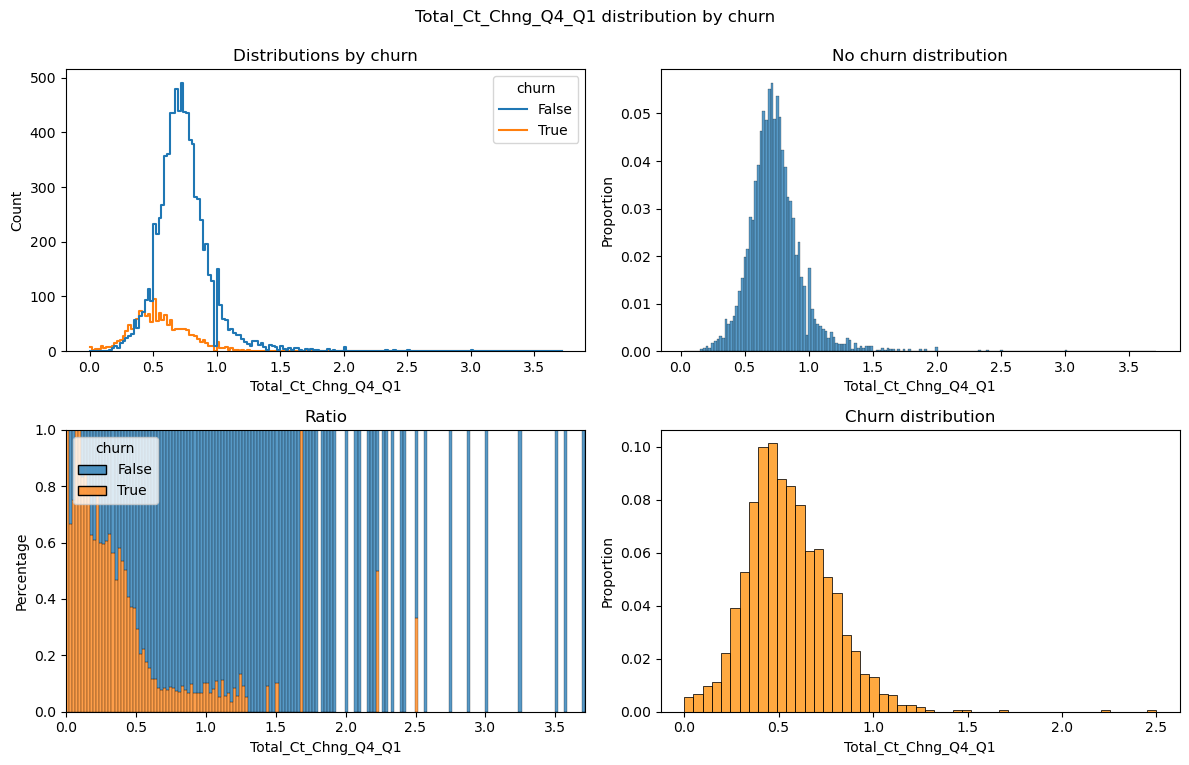

In [22]:
histplots_by(key_features[3], df=data)
plt.show()

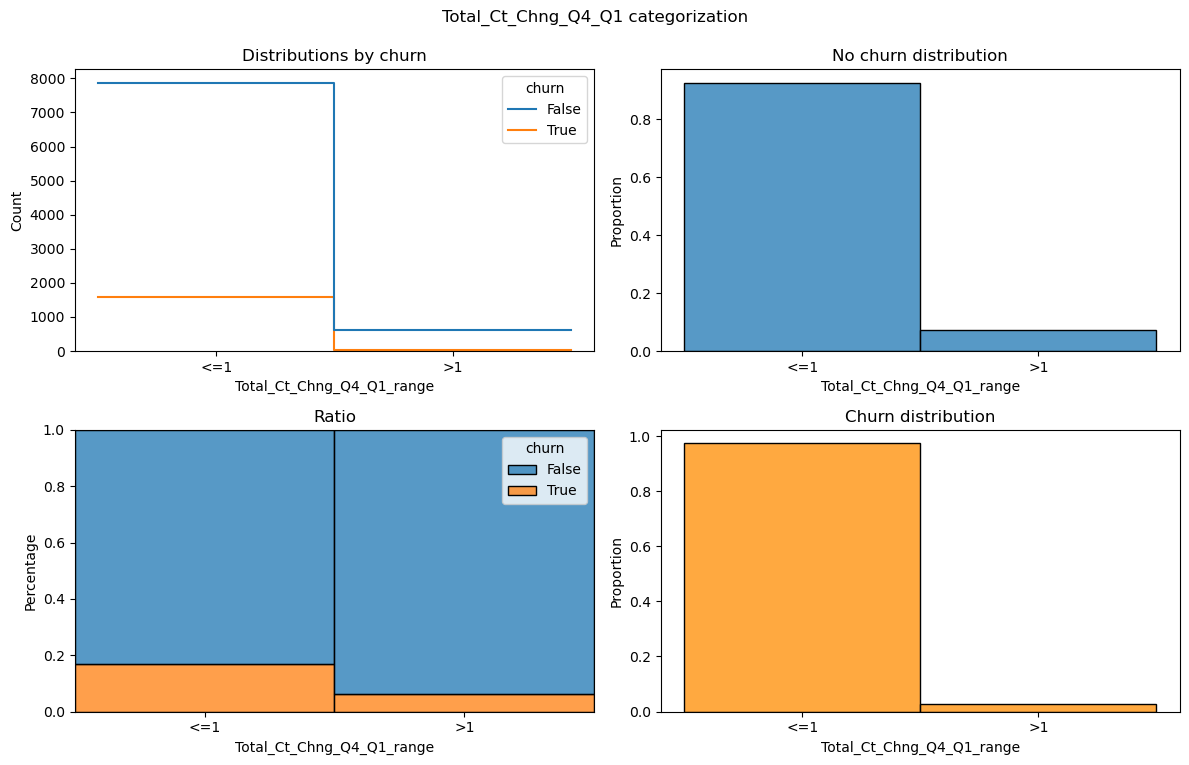

In [23]:
bins=[-np.inf,1,np.inf]

cut_data(key_features[3],bins,df=data)
plt.show()

Avg_Utilization_Ratio

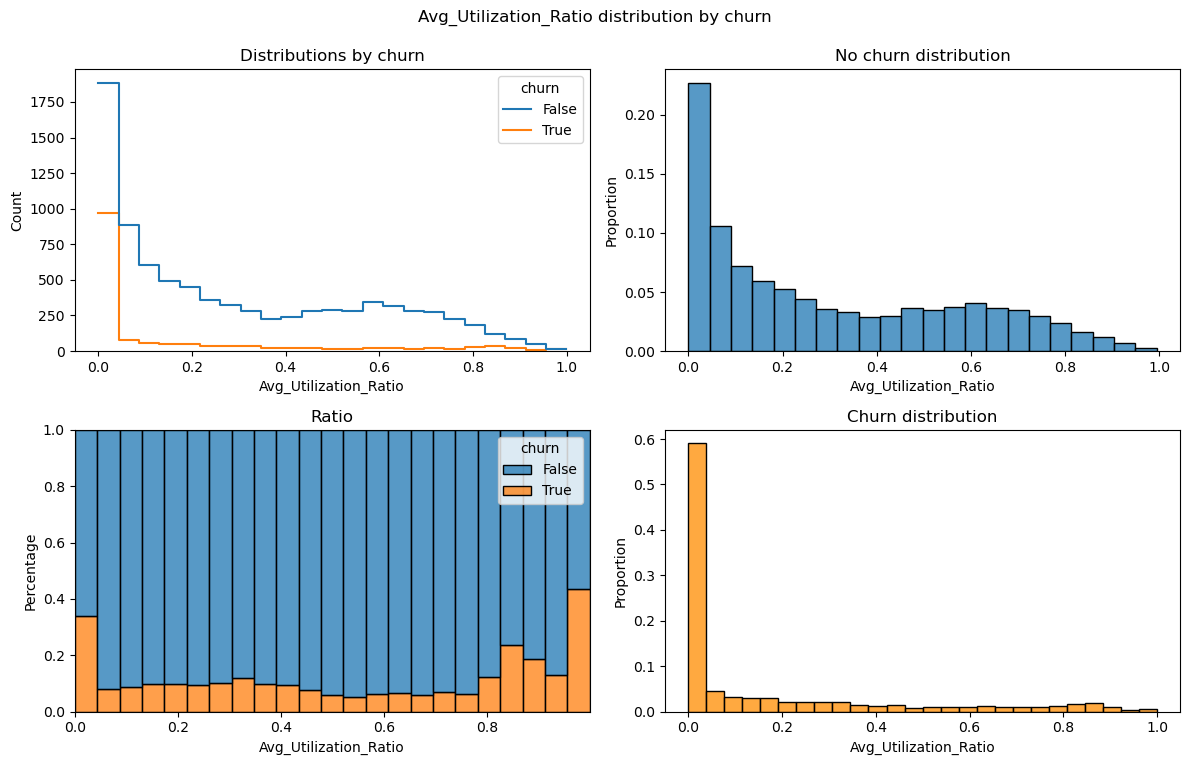

In [24]:
histplots_by(key_features[4], df=data)
plt.show()

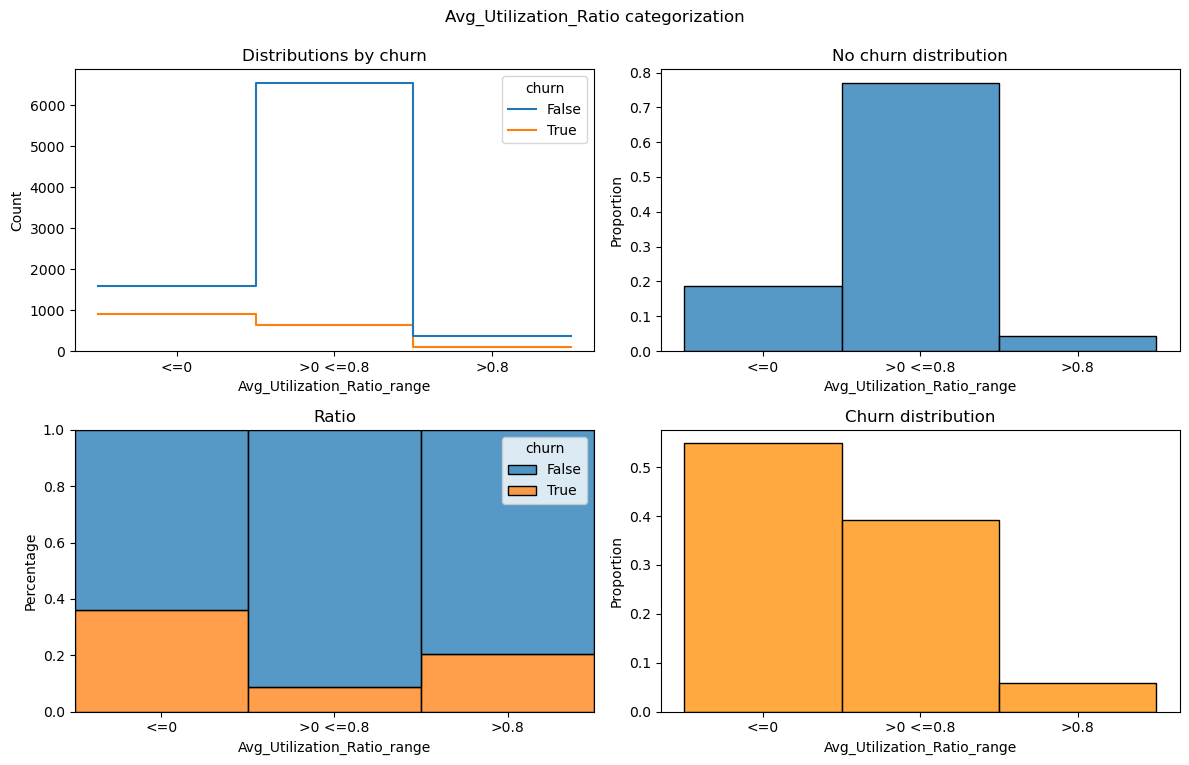

In [25]:
bins=[-np.inf,0,.8,np.inf]

cut_data(key_features[4],bins,df=data)
plt.show()

Review other dimensions for missed trends

In [26]:
histplots_by('Credit_Limit')
plt.show()

TypeError: histplots_by() missing 1 required positional argument: 'df'

In [ ]:
histplots_by('Avg_Open_To_Buy')
plt.show()

In [ ]:
histplots_by('Customer_Age', bw=.5)
plt.show()

In [ ]:
histplots_by('Dependent_count', bw=.5)
plt.show()

In [ ]:
histplots_by('Total_Relationship_Count', bw=.5)
plt.show()

In [ ]:
#add categories for relationship count
bins=[-np.inf,2,np.inf]

cut_data('Total_Relationship_Count',bins)
plt.show()

In [ ]:
histplots_by('Contacts_Count_12_mon', bw=.5)
plt.show()

In [ ]:
#add categories for contacts count
bins=[-np.inf,1,np.inf]

cut_data('Contacts_Count_12_mon',bins)
plt.show()

Others

In [ ]:
#Group months on book into years
data['years_on_book'] = data['Months_on_book'] // 12

histplots_by('years_on_book', bw=.5)
plt.show()

In [ ]:
histplots_by('Months_Inactive_12_mon', bw=.5)
plt.show()

In [ ]:
bins=[-np.inf,0,1,np.inf]

cut_data('Months_Inactive_12_mon',bins)
plt.show()

**Get dummy columns for new key categories and drop non-key columns**

In [ ]:
#identify columns to drop from dataset before modelling
drop_cols = ['CLIENTNUM',
             'Attrition_Flag',
             'Total_Revolving_Bal',
             'Total_Trans_Amt',
             'Total_Trans_Ct',
             'Total_Ct_Chng_Q4_Q1',
             'Avg_Utilization_Ratio',
             'Total_Relationship_Count',
             'Contacts_Count_12_mon',
             'Months_Inactive_12_mon',
             'Months_on_book']

data_prep_cols = [col for col in data.columns if col not in drop_cols]

In [ ]:
#seperate columns into 3 categories for further processing
category_cols = ['Gender',
                 'Education_Level',
                 'Marital_Status',
                 'Income_Category',
                 'Card_Category']
range_cols = [col for col in data_prep_cols if 'range' in col]
category_cols = category_cols + range_cols

y_col = 'churn'

other_cols = [col for col in data_prep_cols if col not in category_cols]
other_cols.remove(y_col)

In [ ]:
#create dummy cols
dummy_cols = pd.get_dummies(data[category_cols], drop_first=True)

In [ ]:
#create preprocessed df
data_preprocess = pd.concat([data[other_cols],dummy_cols,data[y_col]], axis=1)
data_preprocess

**Export datasets as csv**

In [ ]:
data.to_csv('../Data/BankChurnersEnhanced.csv')

In [ ]:
data_preprocess.to_csv('../Data/BankChurnersPreProcessed.csv')